In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [2]:
lena_gray = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

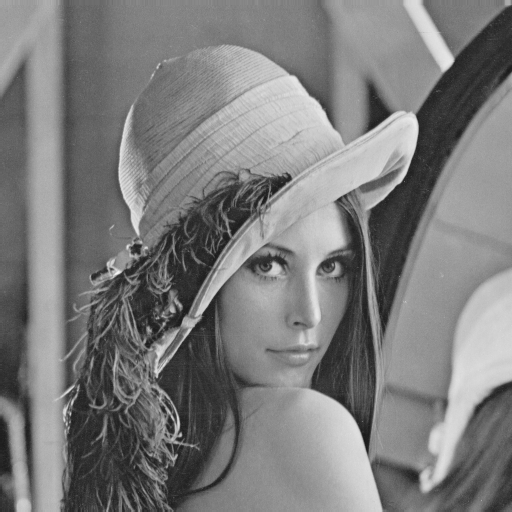

In [3]:
cv2_imshow(lena_gray)

In [4]:
def Robert_Operator(img, threshold):
  m,n = img.shape
  magnitude = np.zeros((m,n))
  temp = img.astype(float)
  magnitude[0:m-1,0:n-1] = np.sqrt((temp[1:m,1:n]-temp[0:m-1,0:n-1])**2 + (temp[1:m,0:n-1]-temp[0:m-1,1:n])**2)
  return np.uint8((magnitude < threshold) * 255)

In [5]:
def conv(img_org, patn):
  img = img_org.astype(float)
  m,n = patn.shape
  M,N = img.shape
  result = np.zeros((M-m+1,N-n+1))
  for r in range(m):
    for c in range(n):
      result += img[r:r+M-m+1,c:c+N-n+1] * patn[r,c]
  return result 

In [6]:
def Prewitt_Edge_Detector(img, threshold):
  border_img = cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_REPLICATE) 
  p1 = np.array([[-1]*3,[0]*3,[1]*3])
  p2 = p1.T
  magnitude = np.sqrt(conv(border_img, p1)**2 + conv(border_img, p2)**2)
  return np.uint8((magnitude < threshold) * 255)

In [7]:
def Sobel_Operator(img, threshold):
  border_img = cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_REPLICATE) 
  s1 = np.array([[-1,-2,-1],[0]*3,[1,2,1]])
  s2 = s1.T
  magnitude = np.sqrt(conv(border_img, s1)**2 + conv(border_img, s2)**2)
  return np.uint8((magnitude < threshold) * 255)

In [8]:
def FreiChen_Gradient_Operator(img, threshold):
  border_img = cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_REPLICATE)
  s1 = np.array([[-1,-np.sqrt(2),-1],[0]*3,[1,np.sqrt(2),1]])
  s2 = s1.T
  magnitude = np.sqrt(conv(border_img, s1)**2 + conv(border_img, s2)**2)
  return np.uint8((magnitude < threshold) * 255)

In [9]:
def spin(mtx):
  a,b,c = [0,0,1],[1,2,2],[0,1,2]
  return np.array([mtx[a,b],mtx[c,c],mtx[b,a]])

In [10]:
def Kirsch_Compass_Operator(img, threshold):
  border_img = cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_REPLICATE) 
  temp = np.array([[-3]*3]*3)
  temp[1,1] = 0
  temp[:,2] = 5
  magnitude = conv(border_img, temp)
  for i in range(7):
    temp = spin(temp)
    magnitude = np.maximum(conv(border_img, temp),magnitude)
  return np.uint8((magnitude < threshold) * 255)

In [11]:
 def Robinson_Compass_Operator(img, threshold):
  border_img = cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_REPLICATE)
  part = np.array([-1,0,1])
  temp = np.array([part,part*2,part])
  magnitude = conv(border_img, temp)
  for i in range(7):
    temp = spin(temp)
    magnitude = np.maximum(conv(border_img, temp),magnitude)
  return np.uint8((magnitude < threshold) * 255)

In [12]:
def Nevatia_Babu_5x5_operator(img, threshold):
  border_img = cv2.copyMakeBorder(img,2,2,2,2,cv2.BORDER_REPLICATE)
  N = []
  N.append(np.array(([100]*5,[100]*5,[0]*5,[-100]*5,[-100]*5)))
  N.append(np.array(([100]*5, [100,100,100,78,-32], [100,92,0,-92,-100], [32,-78,-100,-100,-100], [-100]*5)))
  N.append(np.array(([100,100,100,32,-100], [100,100,92,-78,-100], [100,100,0,-100,-100], [100,78,-92,-100,-100], [100,-32,-100,-100,-100])))
  N.append(np.array([[-100,-100,0,100,100]]*5))
  N.append(np.array(([-100,32,100,100,100], [-100,-78,92,100,100], [-100,-100,0,100,100], [-100,-100,-92,78,100], [-100,-100,-100,-32,100])))
  N.append(np.array(([100]*5, [-32,78,100,100,100], [-100,-92,0,92,100], [-100,-100,-100,-78,32], [-100]*5)))
  magnitude = conv(border_img, N[0])
  for i in range(1,6):
    magnitude = np.maximum(conv(border_img, N[i]),magnitude)
  return np.uint8((magnitude < threshold) * 255)

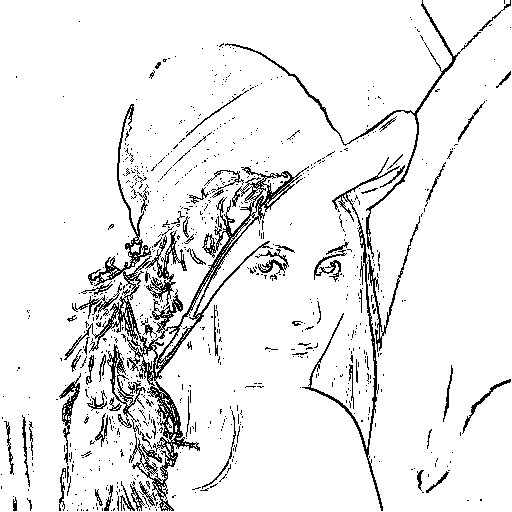

In [14]:
result = Robert_Operator(lena_gray, 30)
cv2_imshow(result)

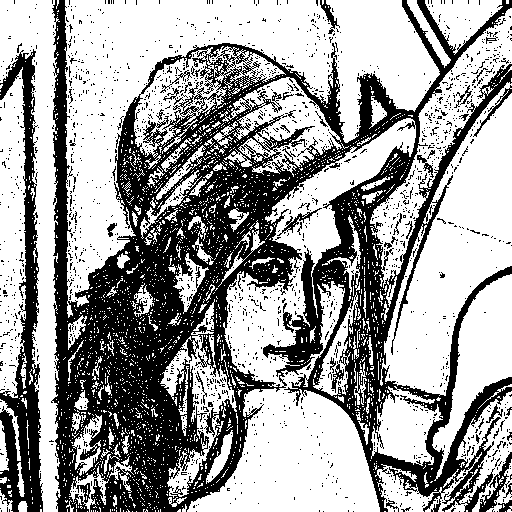

In [ ]:
result = Prewitt_Edge_Detector(lena_gray, 24)
cv2_imshow(result)

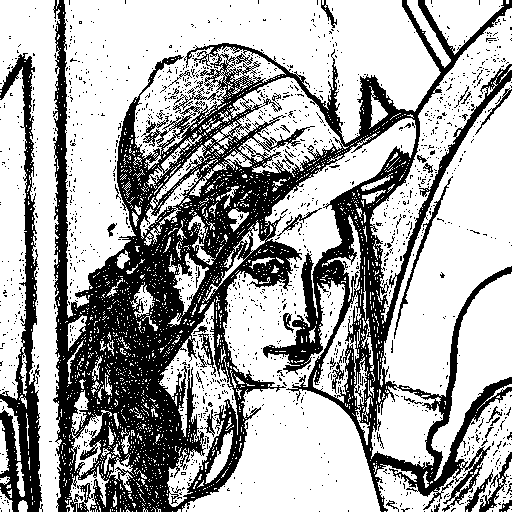

In [ ]:
result = Sobel_Operator(lena_gray, 38)
cv2_imshow(result)

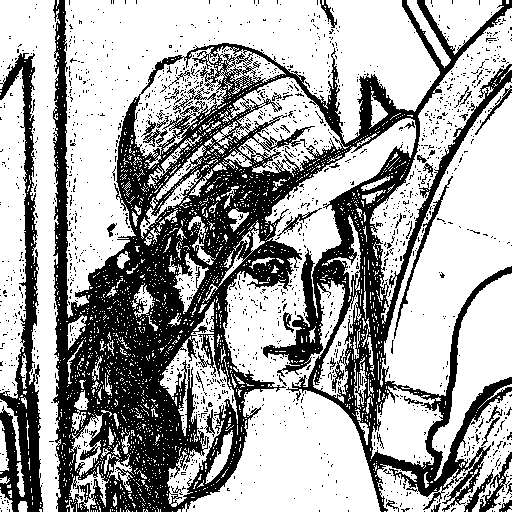

In [ ]:
result = FreiChen_Gradient_Operator(lena_gray, 30)
cv2_imshow(result)

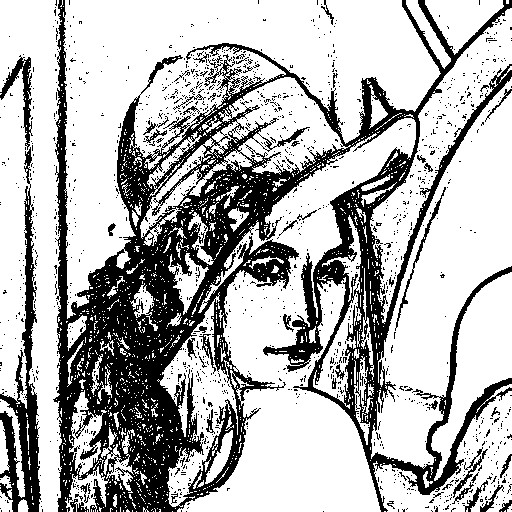

In [ ]:
result = Kirsch_Compass_Operator(lena_gray, 135)
cv2_imshow(result)

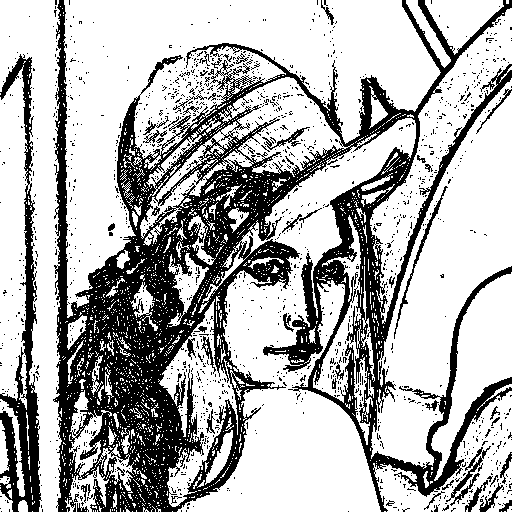

In [ ]:
result = Robinson_Compass_Operator(lena_gray, 43)
cv2_imshow(result)

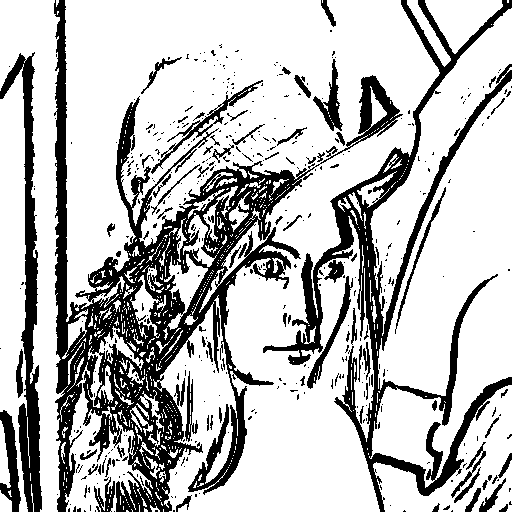

In [ ]:
result = Nevatia_Babu_5x5_operator(lena_gray, 12500)
cv2_imshow(result)

In [15]:
%%writefile /content/drive/MyDrive/CVHW/HW9.py
import cv2
import numpy as np

def conv(img_org, patn):
  img = img_org.astype(float)
  m,n = patn.shape
  M,N = img.shape
  result = np.zeros((M-m+1,N-n+1))
  for r in range(m):
    for c in range(n):
      result += img[r:r+M-m+1,c:c+N-n+1] * patn[r,c]
  return result 

def spin(mtx):
  a,b,c = [0,0,1],[1,2,2],[0,1,2]
  return np.array([mtx[a,b],mtx[c,c],mtx[b,a]])

def Robert_Operator(img, threshold):
  m,n = img.shape
  magnitude = np.zeros((m,n))
  temp = img.astype(float)
  magnitude[0:m-1,0:n-1] = np.sqrt((temp[1:m,1:n]-temp[0:m-1,0:n-1])**2 + (temp[1:m,0:n-1]-temp[0:m-1,1:n])**2)
  return np.uint8((magnitude < threshold) * 255)

def Prewitt_Edge_Detector(img, threshold):
  border_img = cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_REPLICATE) 
  p1 = np.array([[-1]*3,[0]*3,[1]*3])
  p2 = p1.T
  magnitude = np.sqrt(conv(border_img, p1)**2 + conv(border_img, p2)**2)
  return np.uint8((magnitude < threshold) * 255)

def Sobel_Operator(img, threshold):
  border_img = cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_REPLICATE) 
  s1 = np.array([[-1,-2,-1],[0]*3,[1,2,1]])
  s2 = s1.T
  magnitude = np.sqrt(conv(border_img, s1)**2 + conv(border_img, s2)**2)
  return np.uint8((magnitude < threshold) * 255)

def FreiChen_Gradient_Operator(img, threshold):
  border_img = cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_REPLICATE)
  s1 = np.array([[-1,-np.sqrt(2),-1],[0]*3,[1,np.sqrt(2),1]])
  s2 = s1.T
  magnitude = np.sqrt(conv(border_img, s1)**2 + conv(border_img, s2)**2)
  return np.uint8((magnitude < threshold) * 255)

def Kirsch_Compass_Operator(img, threshold):
  border_img = cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_REPLICATE) 
  temp = np.array([[-3]*3]*3)
  temp[1,1] = 0
  temp[:,2] = 5
  magnitude = conv(border_img, temp)
  for i in range(7):
    temp = spin(temp)
    magnitude = np.maximum(conv(border_img, temp),magnitude)
  return np.uint8((magnitude < threshold) * 255)

def Robinson_Compass_Operator(img, threshold):
  border_img = cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_REPLICATE)
  part = np.array([-1,0,1])
  temp = np.array([part,part*2,part])
  magnitude = conv(border_img, temp)
  for i in range(7):
    temp = spin(temp)
    magnitude = np.maximum(conv(border_img, temp),magnitude)
  return np.uint8((magnitude < threshold) * 255)

def Nevatia_Babu_5x5_operator(img, threshold):
  border_img = cv2.copyMakeBorder(img,2,2,2,2,cv2.BORDER_REPLICATE)
  N = []
  N.append(np.array(([100]*5,[100]*5,[0]*5,[-100]*5,[-100]*5)))
  N.append(np.array(([100]*5, [100,100,100,78,-32], [100,92,0,-92,-100], [32,-78,-100,-100,-100], [-100]*5)))
  N.append(np.array(([100,100,100,32,-100], [100,100,92,-78,-100], [100,100,0,-100,-100], [100,78,-92,-100,-100], [100,-32,-100,-100,-100])))
  N.append(np.array([[-100,-100,0,100,100]]*5))
  N.append(np.array(([-100,32,100,100,100], [-100,-78,92,100,100], [-100,-100,0,100,100], [-100,-100,-92,78,100], [-100,-100,-100,-32,100])))
  N.append(np.array(([100]*5, [-32,78,100,100,100], [-100,-92,0,92,100], [-100,-100,-100,-78,32], [-100]*5)))
  magnitude = conv(border_img, N[0])
  for i in range(1,6):
    magnitude = np.maximum(conv(border_img, N[i]),magnitude)
  return np.uint8((magnitude < threshold) * 255)

lena_gray = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

result = Robert_Operator(lena_gray, 12)
cv2.imwrite("Robert_Operator_12.bmp", result)
result = Robert_Operator(lena_gray, 30)
cv2.imwrite("Robert_Operator_30.bmp", result)
result = Prewitt_Edge_Detector(lena_gray, 24)
cv2.imwrite("Prewitt_Edge_Detector_24.bmp", result)
result = Sobel_Operator(lena_gray, 38)
cv2.imwrite("Sobel_Operator_38.bmp", result)
result = FreiChen_Gradient_Operator(lena_gray, 30)
cv2.imwrite("FreiChen_Gradient_Operator_30.bmp", result)
result = Kirsch_Compass_Operator(lena_gray, 135)
cv2.imwrite("Kirsch_Compass_Operator_135.bmp", result)
result = Robinson_Compass_Operator(lena_gray, 43)
cv2.imwrite("Robinson_Compass_Operator_43.bmp", result)
result = Nevatia_Babu_5x5_operator(lena_gray, 12500)
cv2.imwrite("Nevatia_Babu_5x5_operator_12500.bmp", result)

Writing /content/drive/MyDrive/CVHW/HW9.py
